In [1]:
import keras 
from keras.datasets import mnist
import os

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
mnist_data = mnist.load_data(os.path.join(os.getcwd(), 'mnist_dataset.csv'))

In [3]:
train_set, test_set = mnist_data
x_train, y_train = train_set
x_test, y_test = test_set

In [4]:
import hpelm 


In [5]:
y_test = keras .utils.to_categorical(y_test, num_classes=10)
y_train = keras .utils.to_categorical(y_train, num_classes=10)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = x_train.reshape(-1,28*28)
x_test = x_test.reshape(-1,28*28)

In [7]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [8]:
# performance measures
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [9]:
# autoencoder model
autoenc = hpelm.ELM(x_train.shape[1], x_train.shape[1], batch=1000, classification='r',
precision='single')

In [10]:
autoenc.add_neurons(784, 'tanh')

In [11]:
print(autoenc)
import time

ELM with 784 inputs and 784 outputs
Hidden layer neurons: 784 tanh


In [12]:
t = time.time()
autoenc.train(x_train, x_train,'r')

In [13]:
elapsed_time_train = time.time() - t
pred_train = autoenc.predict(x_train)
print("Training time: %f" % elapsed_time_train)
print('Training Accuracy: ', (1 - autoenc.error(x_train, pred_train)))
print()
pred_test = autoenc.predict(x_test)
print('Test Accuracy: %.5f ' % (1-autoenc.error(x_test,pred_test)))

print("Training done in ", (elapsed_time_train), "seconds!!")
print("###############################################################################################")

Training time: 6.905664
Training Accuracy:  0.7511260296252638

Test Accuracy: 0.72535 
Training done in  6.905663967132568 seconds!!
###############################################################################################


In [14]:
int_rep= autoenc.project(x_train)

In [15]:
B_auto = autoenc.nnet.get_B()
B_auto.shape
import numpy as np
B_t = np.transpose(B_auto)
B_t.shape

(784, 784)

In [16]:
import numpy as np
random_weights = np.random.randn(B_t.shape[1], 784)
random_weights.shape


(784, 784)

In [17]:
x_train2 = np.tanh((np.dot(x_train,B_t)))

In [18]:
x_train2.shape

(60000, 784)

In [19]:
x_test2 = np.tanh((np.dot(x_test,B_t)))

In [20]:
x_test2.shape

(10000, 784)

In [21]:
model = hpelm.ELM(x_train2.shape[1], y_train.shape[1] , batch=1000, classification='c',
precision='single')

In [22]:
model.add_neurons(500, 'sigm')
print(model)

ELM with 784 inputs and 10 outputs
Hidden layer neurons: 500 sigm


In [23]:
t = time.time()
model.train(x_train2, y_train,'c')
elapsed_time_train = time.time() - t


In [24]:
pred_train = model.predict(x_train2)
print("Training time: %f" % elapsed_time_train)
print('Training Accuracy: ', (1 - model.error(y_train, pred_train)))
print()
pred_test = model.predict(x_test2)
print('Test Accuracy: %.5f ' % (1-model.error(y_test,pred_test)))

print("Training done in ", (elapsed_time_train), "seconds!!")
print("###############################################################################################")

Training time: 2.664533
Training Accuracy:  0.9005166666666666

Test Accuracy: 0.90020 
Training done in  2.6645331382751465 seconds!!
###############################################################################################


In [25]:
model = hpelm.ELM(x_train.shape[1], y_train.shape[1] , batch=1000, classification='c',
precision='single')
model.add_neurons(500, 'sigm')
print(model)

ELM with 784 inputs and 10 outputs
Hidden layer neurons: 500 sigm


In [26]:
t = time.time()
model.train(x_train, y_train,'c')
elapsed_time_train = time.time() - t


In [27]:
pred_train = model.predict(x_train)
print("Training time: %f" % elapsed_time_train)
print('Training Accuracy: ', (1 - model.error(y_train, pred_train)))
print()
pred_test = model.predict(x_test)
print('Test Accuracy: %.5f ' % (1-model.error(y_test,pred_test)))

print("Training done in ", (elapsed_time_train), "seconds!!")
print("###############################################################################################")

Training time: 2.727609
Training Accuracy:  0.8807666666666667

Test Accuracy: 0.88490 
Training done in  2.727609395980835 seconds!!
###############################################################################################


In [28]:
x_train2.shape


(60000, 784)

In [29]:
import matplotlib.pyplot as plt

In [30]:
def plot_image(image):
    plt.imshow(image.reshape((28,28)),
               interpolation='nearest',
               cmap='binary')

    plt.show()

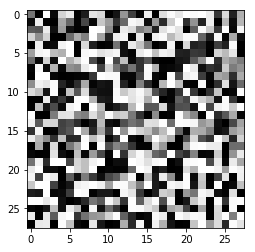

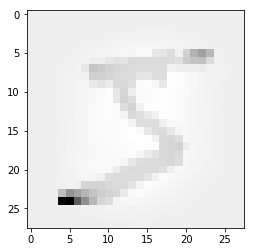

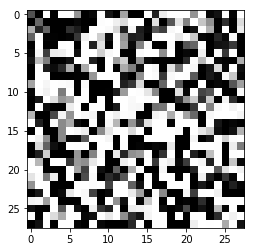

In [31]:
plot_image(x_train2[0])
plot_image(x_train[0])
plot_image(int_rep[0])


In [32]:
y_autoenc = np.dot(int_rep,B_auto)


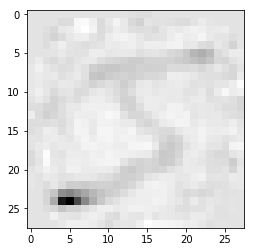

In [33]:
plot_image(y_autoenc[0])

In [34]:
y = np.dot(x_train,B_t)

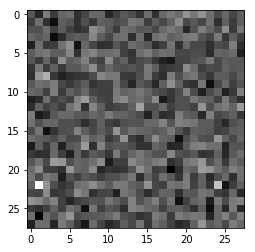

In [35]:
plot_image(y[0])
